---

title: "理解 Dirichlet Distribution"
date: 2024-11-27
author: 郝鸿涛
slug: dirichlet-dist
draft: false
toc: true
tags: 统计

---

## 基本概念

我们在 [双项分布](/cn/2024/03/23/discrete-distributions/) 的基础上介绍了 [Beta 分布](/cn/2024/11/27/beta/)。同样的，我们要在 [多项分布](/cn/2024/11/27/multinomial/) 的基础上介绍 [Dirichlet Distribution](https://en.wikipedia.org/wiki/Dirichlet_distribution)。

随机抛掷 k 面骰子 n 次，每个面 i 出现的概率是 $p_i \left(\sum{p_i} = 1\right)$，那么每个面分别出现 $x_1, x_2,...,x_k \left(\sum{x_i} = n\right)$ 次的概率为：

$$P(x_1,...,x_k|p_1,...,p_k) = \frac{n!}{x_1!x_2!...x_k!} \cdot p_1^{x_1} \cdot p_2^{x_2} \cdot ... \cdot p_k^{x_k}$$

这是多项分布。

那如果随机抛掷 k 面骰子 n 次，最后每个面分别出现 $x_1, x_2,...,x_k \left(\sum{x_i} = n\right)$ 次，请问每个面 i 出现的概率 $p_i$ 是什么？

根据贝叶斯定理

$$P(p_1,...,p_k|x_1,...,x_k) \propto P(p_1,...,p_k)\cdot P(x_1,...,x_k|p_1,...,p_k)$$

我们没有任何先验信息，所以使用均匀分布作为先验，也就是说 $P(p_1,...,p_k)=1$。另外，$\frac{n!}{x_1!x_2!...x_k!}$ 也是一个常数。所以：

$$P(p_1,...,p_k|x_1,...,x_k) \propto \prod_{i=1}^k p_i^{x_i}$$

## 具体例子

为了简化，我们假设有 3 面的骰子，投掷 10 次，观测到的数据为

$$x_1 = 2, x_2 = 3, x_3 = 5$$

我们知道 $p_i \ge 0$ 且 $p_1 + p_2 + p_3 = 1$

在不考虑归一化的情况下，$P(p_1 = 0.1, p_2 = 0.7, p_3 = 0.2)$ 的概率密度是

$$\prod_{i=1}^3 p_i^{x_i} = 0.1^2 \cdot 0.7^3 \cdot 0.2^5$$

它肯定没有 $P(p_1 = 0.1, p_2 = 0.2, p_3 = 0.7)$ 的概率密度大：

$$\prod_{i=1}^3 p_i^{x_i} = 0.1^2 \cdot 0.2^3 \cdot 0.7^5$$

## 标准公式 

记 $\alpha_i$ 为

$$\alpha_i = x_i + 1$$

所以

$$P(p_1,...,p_k|\alpha_1,...,\alpha_k) \propto \prod_{i=1}^k p_i^{\alpha_i - 1}$$

最后要除以一个归一化的常数，我们用 $\mathrm {B}(\alpha)$ 表示：

$$\mathrm {B} ({\boldsymbol {\alpha }})={\frac {\prod \limits _{i=1}^{K}\Gamma (\alpha _{i})}{\Gamma \left(\sum \limits _{i=1}^{K}\alpha _{i}\right)}},\qquad {\boldsymbol {\alpha }}=(\alpha _{1},\ldots ,\alpha _{K})$$

这个比较复杂，我们这里不讲如何推导 $\mathrm {B}(\alpha)$。

最后，Dirchlet Distribution 的完整表达式为

$$P(p_1,...,p_k|\alpha_1,...,\alpha_k)= \frac{1}{\mathrm {B}(\alpha)} \prod_{i=1}^k p_i^{\alpha_i - 1}$$

## 可视化

最后 Dirchlet Distribution 长什么样子呢？

我们举一个例子。假如我们求的是 $p_1, p_2, p_3$。那我们知道 $p_i \ge 0$ 且 $p_1+p_2+p_3 = 1$。

我们可以画一个三角形，其内任何一点表示联合分布。然后每一个点上加一个高度，表示该联合概率分布的密度。

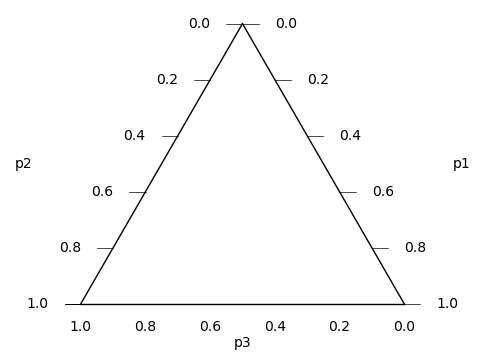

In [1]:
#| code-fold:true

import numpy as np
import matplotlib.pyplot as plt

# 创建图形
plt.figure(figsize=(6, 4))

# 计算等边三角形的顶点
height = np.sqrt(3)/2
vertices = np.array([[0,0], [1,0], [0.5,height]])

# 绘制三角形边
plt.plot([0,1], [0,0], 'k-', linewidth=1)
plt.plot([0,0.5], [0,height], 'k-', linewidth=1)
plt.plot([1,0.5], [0,height], 'k-', linewidth=1)

# 添加刻度
# x3轴（底边）
for i in np.linspace(0, 1, 6):
    plt.plot([i,-0.05], [0,0], 'k-', linewidth=0.5)
    plt.text(i, -0.05, f'{1-i:.1f}', ha='center', va='top')

# x1轴（左边）
for i in range(6):
    x = i/10
    y = i*height/5
    plt.plot([x,x-0.05], [y,y], 'k-', linewidth=0.5)
    plt.text(x-0.1, y, f'{1-i/5:.1f}', ha='right', va='center')

# x2轴（右边）
for i in range(6):
    x = 1 - i/10
    y = i*height/5
    plt.plot([x,x+0.05], [y,y], 'k-', linewidth=0.5)
    plt.text(x+0.1, y, f'{1-i/5:.1f}', ha='left', va='center')

# 添加轴标签
plt.text(0.5, -0.1, 'p3', ha='center', va='top')
plt.text(-0.15, height/2, 'p2', ha='right', va='center')
plt.text(1.15, height/2, 'p1', ha='left', va='center')

# 设置图形范围和比例
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1)

# 设置等比例
plt.axis('equal')

# 移除默认坐标轴
plt.axis('off')

plt.show()

最后的结果如下：

![dirichlet distribution](img/wikipedia-dirichlet-dist2.png)

此图来自维基百科上的 [Dirichlet distribution 词条](https://en.wikipedia.org/wiki/Dirichlet_distribution)。